In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(42)

In [3]:
df = pd.read_csv('course_page_actions.csv')
df.head()

,timestamp,id,group,action,duration
0,2016-09-24 17:14:52.012145,261869,experiment,view,130.545004
1,2016-09-24 18:45:09.645857,226546,experiment,view,159.862440
2,2016-09-24 19:16:21.002533,286353,experiment,view,79.349315
3,2016-09-24 19:43:06.927785,842279,experiment,view,55.536126
4,2016-09-24 21:08:22.790333,781883,experiment,view,204.322437


In [4]:
# new solution
# 因为CTR是看cookie的，所以不要求unique，所以不用nunique（视频中之前的）
# 只是用count()就好了
# Get dataframe with all records from control group
control_df = df.query('group == "control"')

# Compute click through rate for control group
# control_ctr = control_df.query('action == "enroll"').id.nunique() / control_df.query('action == "view"').id.nunique()
control_ctr = control_df.query('action == "enroll"').count()[0] / control_df.query('action == "view"').count()[0]
## 上面的分母之所以要进行action == view的筛选，是因为同一个id view和enroll是分开计算的。所以这里要排除掉enroll的

# Display click through rate
control_ctr

0.23452157598499063

In [5]:
# new solution
# Get dataframe with all records from experiment group
experiment_df = df.query('group == "experiment"')

# Compute click through rate for experiment group
experiment_ctr = experiment_df.query('action == "enroll"').count()[0] / experiment_df.query('action == "view"').count()[0]

# Display click through rate
experiment_ctr

0.2642986152919928

In [6]:
# Compute the observed difference in click through rates
obs_diff = experiment_ctr - control_ctr

# Display observed difference
obs_diff

0.02977703930700215

In [13]:
# kylie
# Create a sampling distribution of the difference in proportions
# with bootstrapping
# 设定空列表
diffs = []
size = df.shape[0]
# 循环1w遍
for _ in range(1000):
    # 抽样每次抽样都是和df相同的数量（所以会比较慢）
    # 使用自展法
    b_samp = df.sample(size, replace=True)
    # 区分control组与experiment组
    control_df = b_samp.query('group == "control"')
    experiment_df = b_samp.query('group == "experiment"')
    # 得出两个组的CTR
    control_ctr = control_df.query('action == "enroll"').count()[0] / control_df.query('action == "view"').count()[0]
    experiment_ctr = experiment_df.query('action == "enroll"').count()[0] / experiment_df.query('action == "view"').count()[0]
    # 计算CTR的差值追加到diffs中
    diffs.append(experiment_ctr - control_ctr)

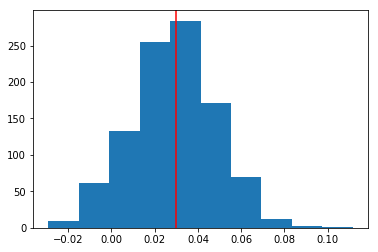

In [14]:
# 之后将列表转为array格式（好用np的特性）
diffs = np.array(diffs)
# 画个图
plt.hist(diffs)
# 我们可以把实际的diff画个红线做参考
plt.axvline(x = obs_diff, color = 'red');

0.019344337339204216

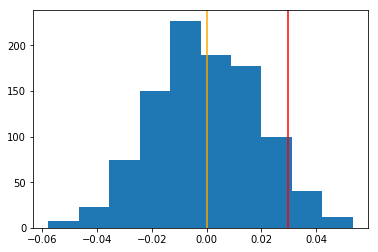

In [15]:
# Simulate distribution under the null hypothesis
# 因为diffs是正态分布，所以使用random.normal优化模拟
# 使用.random.normal模拟正态分布
# !!! 0为正态分布的中点（因为H0假设是没区别，所以中点为0）
# 使用实际数据的diffs.std()进行模拟（std决定了正态分布的宽窄）
# 数量依旧和实际保持一致（diffs.size)
null_vals = np.random.normal(0,diffs.std(), diffs.size)

# Plot observed statistic with the null distibution
# 再画个图呗
plt.hist(null_vals)
# 我们可以把实际的diff画个红线做参考
plt.axvline(x = obs_diff, color = 'red')
# 也把h0假设没有差异的0画出来
plt.axvline(x = 0, color = 'orange');
diffs.std()

In [16]:
# 直接用正态分布模拟出来的和真正的obs做比较
# 直接比较 p值
# null_vals > obs_diff 是直接使用的向量计算
# 生成的是一个True False的 array
# 直接使用mean就会得出True的比率
# 因为True相当于1，False相当于0
(null_vals > obs_diff).mean()
# 结果发现比a = 0.05小，可以拒绝0假设了

0.061